
# "Уравнение Бюргерса. Изучение поведения различных схем"
## Метод Куранта-Изаксона-Риса
$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + \frac{(u_{i+1}^n)^2-(u_{i-1}^n)^2}{4 \Delta x} = \frac{|u^n_{i+1/2}|(u^n_{i+1}-u^n_i)-|u^n_{i-1/2}|(u_n^i-u_{i-1}^n)}{2\Delta x}+\nu \frac{u_{i+1}^n-2u_i^n + u_{i-1}^n}{(\Delta x)^2},$$
	$$ u_{i+1/2}^n= \frac{u_i^n+u_{i+1}^n}{2}$$

In [75]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
A = -1; B = 1; T = 0.5   # границы
h = 0.05; tau = 0.0025     # размеры шага по времени и координате
M = int ((B-A)/h)# количество узлов по координате
N = int(T / tau)              # количество узлов по времени
u1 = np.linspace(A, B, M+1)
u2 = np.linspace(0,0,M+1)
x = np.linspace(A, B, M+1)
nu = .1

In [78]:
cou1 = np.abs(u1).max() * tau / h
cou2 = nu * tau / h**2
print 'Hyperbolic Courant:', cou1, 'Parabolic Courant:', cou2

Hyperbolic Courant: 0.05 Parabolic Courant: 0.1


In [79]:
def Gauss(x, mu, sigma):
    return math.exp((-(x-mu)**2)/(2*sigma**2))

In [80]:
mu = 0
sigma = .2

In [81]:
for i in range(M+1):
    u1[i] = Gauss(x[i], mu, sigma)
u0 = u1.copy() 

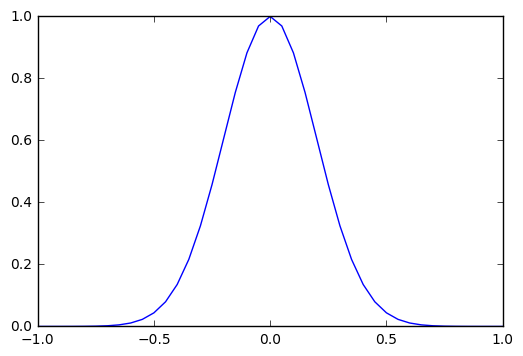

In [82]:
plt.plot(x, u0)

In [83]:
u1[0] = u1[M] = 0

In [84]:
for i in range(N):
    for j in range(1, M):
        d1 = (u1[j] + u1[j - 1]) / 2
        d2 = (u1[j] + u1[j + 1]) / 2
        val1 = (u1[j-1]**2-u1[j+1]**2)/(4*h)
        val2 = (d2*(u1[j+1]-u1[j])-d1*(u1[j]-u1[j-1]))/(2*h)
        val3 = nu*(u1[j+1]-2*u1[j]+u1[j-1])/(h**2)
        u2[j] = u1[j] + tau * (val1 + val2 + val3)
    u1, u2 = u2, u1

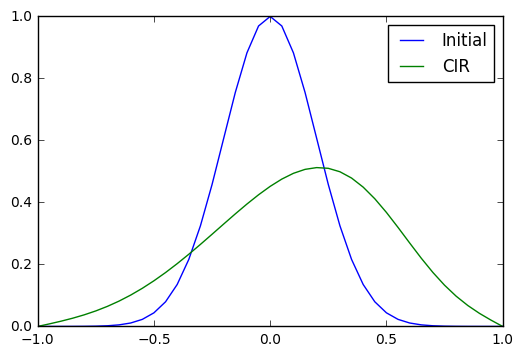

In [85]:
plt.plot(x, u0, label='Initial')
plt.plot(x, u1, label='CIR')
plt.legend(loc='best')